In [ ]:
!pip install --upgrade pandas pyarrow



In [ ]:
!pip install  seaborn matplotlib pyarrow pandas numpy

In [2]:
import pyarrow.parquet as pq

# Leer tabla parquet
table = pq.read_table("../data/processed/merged_titanic.parquet")

# Convertir a DataFrame de pandas
df = table.to_pandas()
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,None,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,None,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,None,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,None,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,None,S,1


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

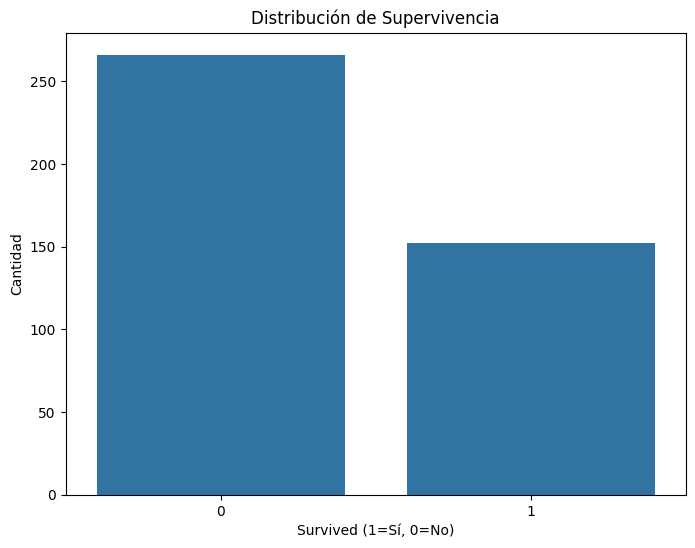

In [6]:
# 1 Distribución de supervivencia
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivencia')
plt.xlabel('Survived (1=Sí, 0=No)')
plt.ylabel('Cantidad')
plt.savefig('../results/dist_supervivencia.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

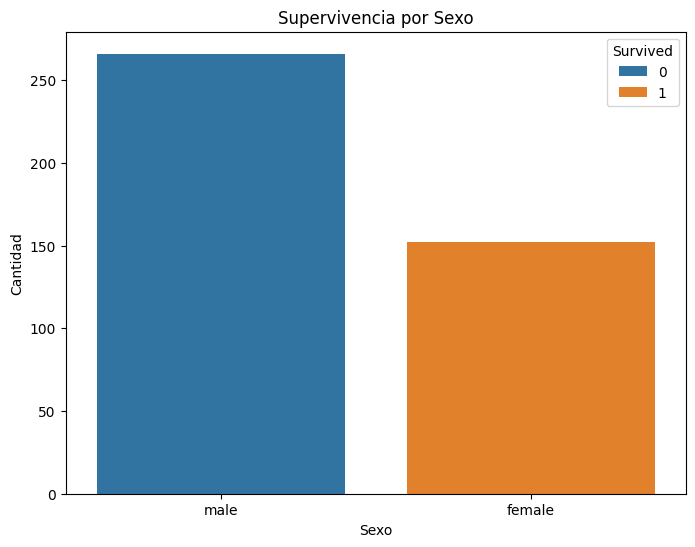

In [7]:
# 2 Supervivencia por sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(title='Survived')
plt.savefig('../results/sup_porSexo.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

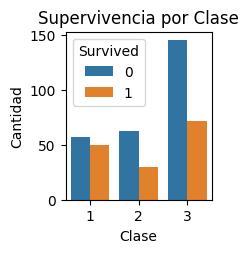

In [8]:
# 3 Supervivencia por clase
plt.subplot(2, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.savefig('../results/sup_por_clase.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

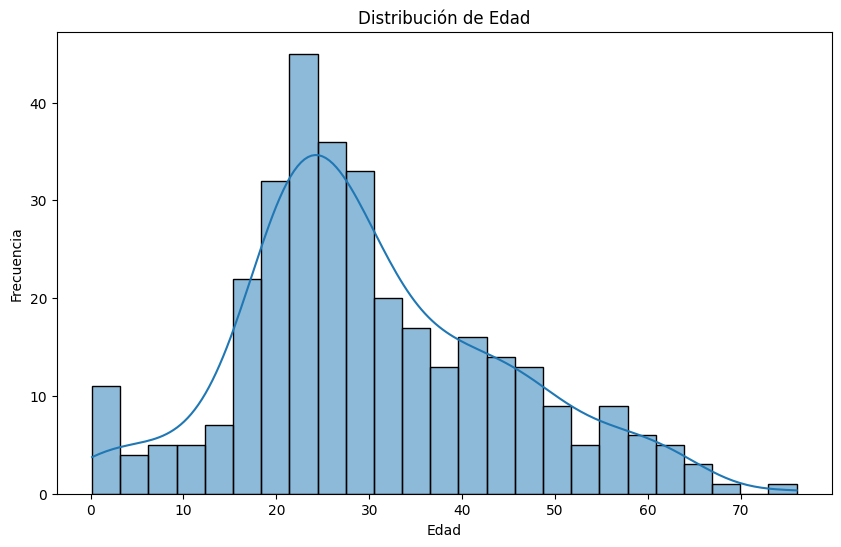

In [9]:
# 4 Distribución de edades 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=25, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('../results/dist_edad.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

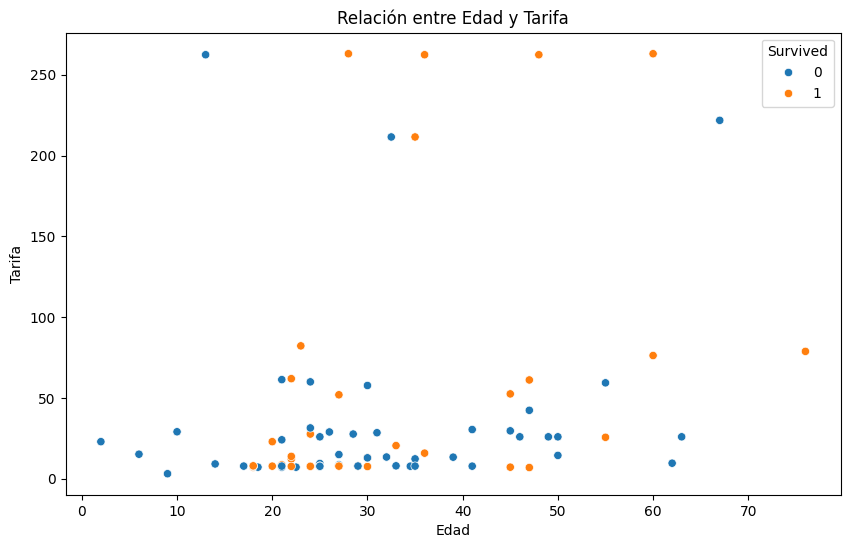

In [10]:
# 5️ Edad vs. Tarifa 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df.head(100))
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.savefig('../results/relacion_edad_tarifa.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

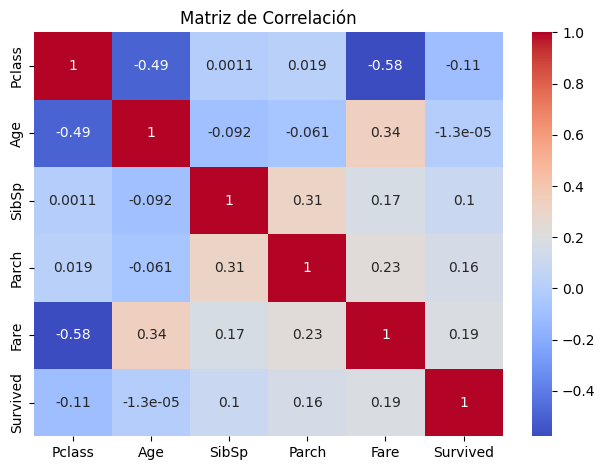

In [11]:
# 6️ Mapa de calor de correlaciones
corr = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('../results/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()